<a href="https://colab.research.google.com/github/Nedzelskij/ML_lab5/blob/main/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import NearestCentroid

# 1. Відкрити та зчитати наданий файл з даними.

In [127]:
df = pd.read_csv('dataset2_l4.txt', sep=',')
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


# 2. Визначити та вивести кількість записів.

In [128]:
print("Кількість записів у файлі: ", df.shape[0])

Кількість записів у файлі:  8250


# 3. Видалити атрибут Class.

In [129]:
df.drop(columns=['Class'], inplace=True)
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652


# 4. Вивести атрибути, що залишилися.

In [130]:
list(df.columns)

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

# 5. Використовуючи функцію KMeans бібліотеки scikit-learn, виконати розбиття набору даних на кластери з випадковою початковою ініціалізацією і вивести координати центрів кластерів. Оптимальну кількість кластерів визначити на основі початкового набору даних трьома різними способами:
# 1) elbow method;
# 2) average silhouette method;
# 3) prediction strength method.

In [ ]:
def two_points_in_same_cluster(first_point, second_point, centroids):
    f_index = s_index = 0
    f_min_distance = s_min_distance = float('inf')
    for i, center in enumerate(centroids):
        f_distance = sum((first_point - center) ** 2)
        s_distance = sum((second_point - center) ** 2)
        if s_distance < s_min_distance:
            s_index = i
            s_min_distance = s_distance
        if f_distance < f_min_distance:
            f_index = i
            f_min_distance = f_distance

    return f_index == s_index


def prediction_strength_method(set_of_data, data_labels, training_centers, k):
    count_for_each_cluster = []
    length_of_clusters = []
    counts = []
    for k_i in range(k):
        length_of_cluster = data_labels.tolist().count(k_i)
        length_of_clusters.append(length_of_cluster)
        counts.append(0)

    number_of_points = len(data_labels)
    count = 0
    for i in range(number_of_points - 1):
        for j in range(i + 1, number_of_points):
            if data_labels[i] == data_labels[j]:
                counts[data_labels[i]] += two_points_in_same_cluster(set_of_data[i], set_of_data[j], training_centers)

    for k_i in range(k):
        if length_of_clusters[k_i] > 1:
            count_for_each_cluster.append(4 * counts[k_i] / (length_of_clusters[k_i] * (length_of_clusters[k_i] - 1)))

    return min(count_for_each_cluster)


number_of_clusters = range(4, 16)
models = []
inertia = []
silhouette_scores = []
strengths_predict = []

for k in number_of_clusters:
    print(k)
    current_model = KMeans(n_clusters=k, init='random', n_init='auto', random_state=15).fit(df)
    models.append(current_model)

    inertia.append(current_model.inertia_)
    silhouette_scores.append(silhouette_score(df, current_model.labels_))

    shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=15)
    p_strength = []
    for train_index, test_index in shuffle_split.split(df):
        print(f'k')
        x_train, x_test = df.iloc[train_index], df.iloc[test_index]
        train_kmeans_model = KMeans(n_clusters=k, init='random', n_init='auto', random_state=15).fit(x_train)
        test_kmeans_model = KMeans(n_clusters=k, init='random', n_init='auto', random_state=15).fit(x_test)
        score = prediction_strength_method(x_test.values, test_kmeans_model.labels_, train_kmeans_model.cluster_centers_, k)

        p_strength.append(score)

    strengths_predict.append(np.mean(p_strength))

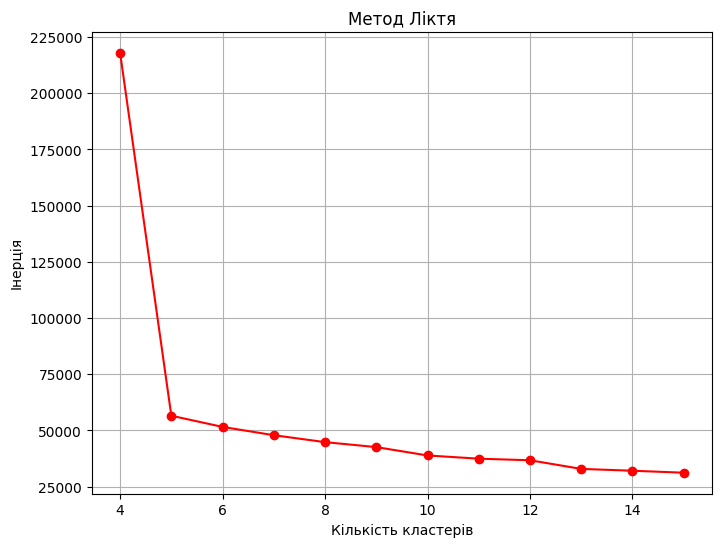

In [132]:
plt.figure(figsize=(8, 6))
plt.plot(number_of_clusters, inertia, color='red', marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Метод Ліктя')
plt.grid(True)
plt.show()

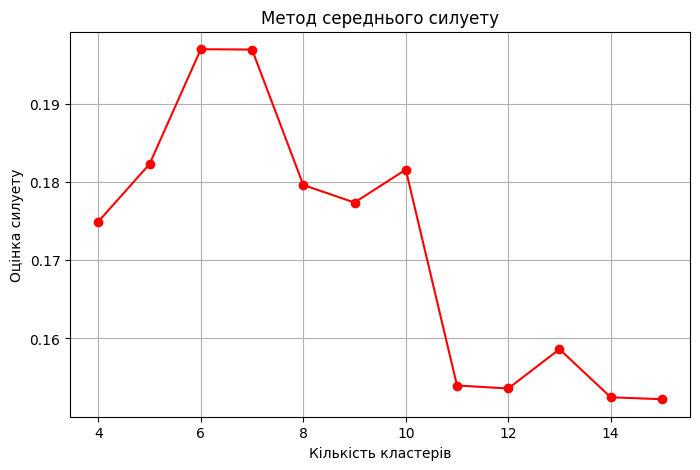

In [133]:
plt.figure(figsize=(8, 6))
plt.plot(number_of_clusters, silhouette_scores, color='red', marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Оцінка силуету')
plt.title('Метод середнього силуету')
plt.grid(True)
plt.show()

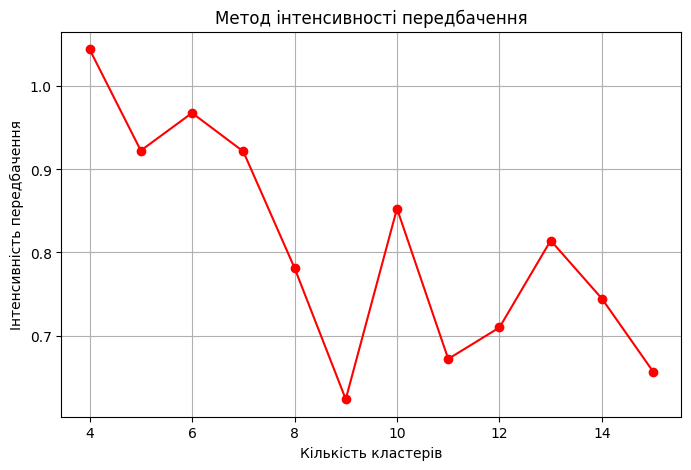

In [134]:
plt.figure(figsize=(8, 6))
plt.plot(number_of_clusters, strengths_predict, color='red', marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інтенсивність передбачення')
plt.title('Метод інтенсивності передбачення')
plt.grid(True)
plt.show()

In [135]:
optimal_kmeans = models[6]
optimal_kmeans.cluster_centers_

array([[-1.89656787e+00,  1.24567268e+01, -4.66762933e-01,
         5.15357033e-01, -3.33724257e+00, -5.74665433e-01,
        -8.68713200e-01,  1.42368260e+00, -1.65193640e+00,
        -1.05202977e+00],
       [ 0.00000000e+00,  3.86000000e+02,  5.00000000e+01,
         1.68104000e-01,  0.00000000e+00,  5.30000000e+01,
         8.30000000e+01,  2.75032000e-01,  4.40000000e+01,
         6.38020000e-01],
       [ 1.10355483e-01,  8.01347797e-03,  2.35387228e-01,
        -2.89802172e-01,  1.49467582e-01, -4.05236079e-01,
         2.88886682e-01,  8.47139581e-02,  6.56006405e-02,
        -3.97002593e-01],
       [-3.25621150e-02, -4.22836018e-02,  2.81128816e-01,
         8.73200348e-01,  1.10722711e-01,  3.50109594e-01,
         2.25713566e-01,  7.07347088e-01,  4.76153199e-01,
         3.25508157e-01],
       [-1.88828937e-01,  1.81799895e-02, -1.31768463e-01,
        -1.52785489e+00, -1.72341801e+00, -2.04998741e+00,
        -5.40119136e+00, -4.88778326e-01, -2.44684513e+00,
        -4.

# 6. За раніш обраної кількості кластерів багаторазово проведіть кластеризацію методом k-середніх, використовуючи для початкової ініціалізації метод k-means++.
# Виберіть найкращий варіант кластеризації. Який кількісний критерій ви обрали для відбору найкращої кластеризації?

In [136]:
k = 10
random_states = [1, 2, 9, 11, 16, 17]
models = []
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for random_state in random_states:
    current_model = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=random_state).fit(df)
    models.append(current_model)
    inertia.append(current_model.inertia_)
    silhouette_scores.append(silhouette_score(df, current_model.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df, current_model.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(df, current_model.labels_))

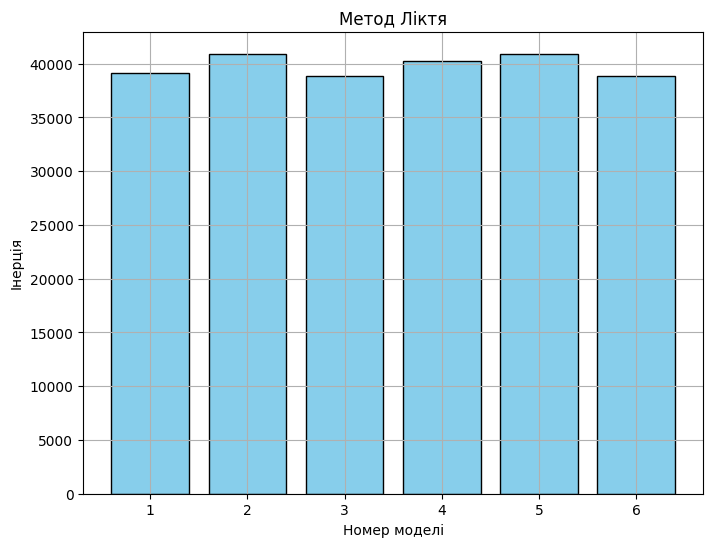

In [137]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(random_states) + 1), inertia, color='skyblue', edgecolor='black')
plt.xlabel('Номер моделі')
plt.ylabel('Інерція')
plt.title('Метод Ліктя')
plt.xticks(range(1, len(random_states) + 1))
plt.grid(True)
plt.show()

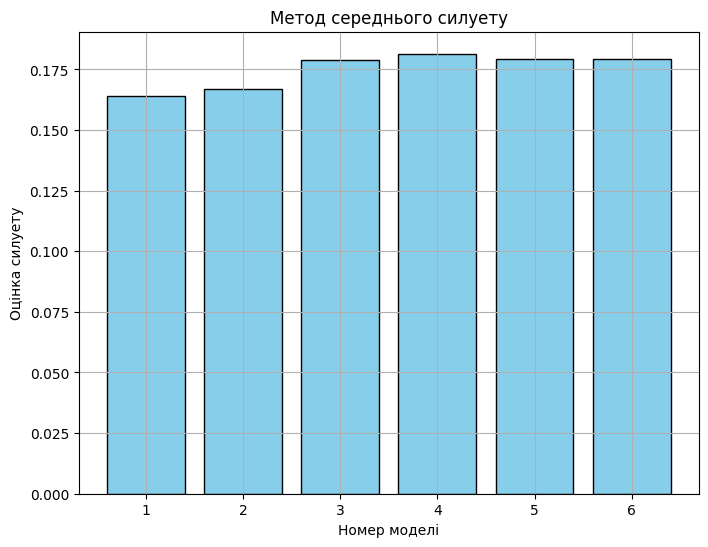

In [138]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(random_states) + 1), silhouette_scores, color='skyblue', edgecolor='black')
plt.xlabel('Номер моделі')
plt.ylabel('Оцінка силуету')
plt.title('Метод середнього силуету')
plt.xticks(range(1, len(random_states) + 1))
plt.grid(True)
plt.show()

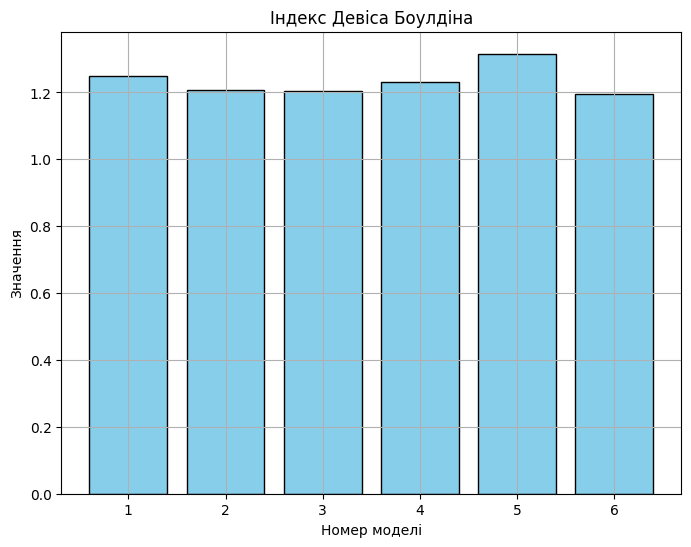

In [139]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(random_states) + 1), davies_bouldin_scores, color='skyblue', edgecolor='black')
plt.xlabel('Номер моделі')
plt.ylabel('Значення')
plt.title('Індекс Девіса Боулдіна')
plt.xticks(range(1, len(random_states) + 1))
plt.grid(True)
plt.show()

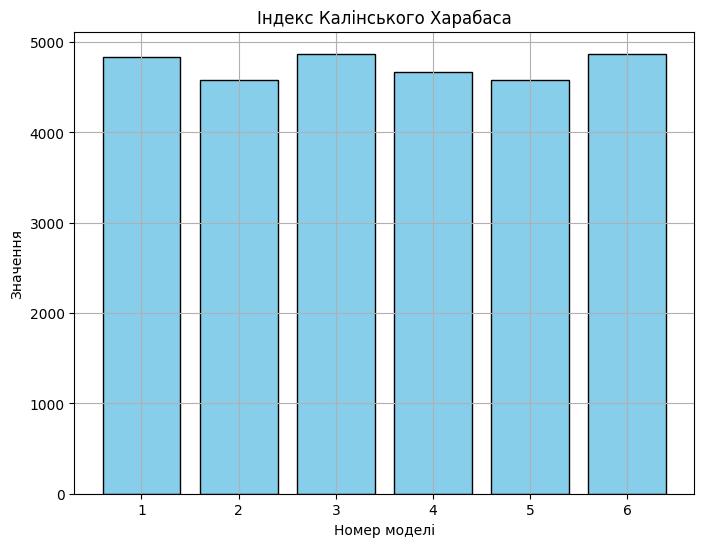

In [140]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(random_states) + 1), calinski_harabasz_scores, color='skyblue', edgecolor='black')
plt.xlabel('Номер моделі')
plt.ylabel('Значення')
plt.title('Індекс Калінського Харабаса')
plt.xticks(range(1, len(random_states) + 1))
plt.grid(True)
plt.show()

In [141]:
optimal_kmeans_plusplus = models[2]
optimal_kmeans_plusplus.cluster_centers_

array([[ 4.33706742e-03, -9.08008764e-02,  1.95530108e-01,
         8.64664671e-02,  1.13662962e-01,  1.38224852e+00,
         2.39021469e-01, -7.84908155e-01, -4.88231888e-01,
         1.21605404e+00],
       [ 0.00000000e+00,  3.86000000e+02,  5.00000000e+01,
         1.68104000e-01,  0.00000000e+00,  5.30000000e+01,
         8.30000000e+01,  2.75032000e-01,  4.40000000e+01,
         6.38020000e-01],
       [-2.19471121e-02, -3.29751379e-02,  2.67919256e-01,
         7.78839542e-01,  1.12428274e-01,  2.69443095e-01,
         2.75259579e-01,  6.67048392e-01,  4.06693250e-01,
         2.21786762e-01],
       [-9.73894571e-01,  2.86030000e-02, -1.10953262e-01,
        -1.46351392e+00, -1.79717179e+00, -2.06109019e+00,
        -5.71263070e+00, -5.00705381e-01, -2.37920712e+00,
        -4.22863145e+00],
       [ 1.05652489e+00, -8.32457140e-02,  8.46289640e-02,
        -1.12099579e+00, -1.16709262e-01, -1.15968602e+00,
        -2.93807902e-01, -1.75642961e+00, -1.68796139e+00,
        -1.

# 7. Використовуючи функцію AgglomerativeClustering бібліотеки scikit-learn, виконати розбиття набору даних на кластери. Кількість кластерів обрати такою ж самою, як і в попередньому методі. Вивести координати центрів кластерів.

In [142]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=k)
prediction = agglomerative_clustering.fit_predict(df)

nearest_centroid = NearestCentroid()
nearest_centroid.fit(df, prediction)
nearest_centroid.centroids_

array([[ 1.42095931e-01, -7.01044536e-02,  2.27263737e-01,
        -9.81478955e-02,  2.08438945e-01, -4.29887721e-01,
         9.09193530e-02,  1.40349939e-01,  2.09347673e-01,
        -3.04631567e-01],
       [-3.20780590e+00,  3.06750025e-01, -2.70747500e-01,
        -1.27394234e+00, -3.71970125e+00, -7.29470683e-01,
        -5.51048465e-01,  1.55340465e-01, -1.31485445e+00,
        -8.83364162e-01],
       [ 1.04818718e-01, -7.00856455e-02,  1.75183995e-01,
        -2.57466350e-01, -1.28295895e-01, -5.22277123e-01,
        -3.69185316e+00, -5.46317418e-01, -8.31816468e-01,
        -2.24890897e+00],
       [-9.76564390e-03, -5.21342732e-02,  8.55950507e-02,
        -1.76769854e-03,  5.00007122e-02,  1.48403951e+00,
         3.42893041e-01, -8.50006665e-01, -5.81762959e-01,
         1.26900560e+00],
       [-3.24761099e-02, -1.65536688e-01, -3.04216631e+00,
        -5.66981225e-01,  1.23371867e-01,  1.24002278e-01,
         8.31018440e-03,  7.49102589e-02,  1.30630144e-01,
         5.

# 8. Порівняти результати двох використаних методів кластеризації.

In [143]:
models = [optimal_kmeans_plusplus, agglomerative_clustering]
comparison_silhouette_scores = []
comparison_davies_bouldin_scores = []
comparison_calinski_harabasz_scores = []

for model in models:
    comparison_silhouette_scores.append(silhouette_score(df, model.labels_))
    comparison_davies_bouldin_scores.append(davies_bouldin_score(df, model.labels_))
    comparison_calinski_harabasz_scores.append(calinski_harabasz_score(df, model.labels_))

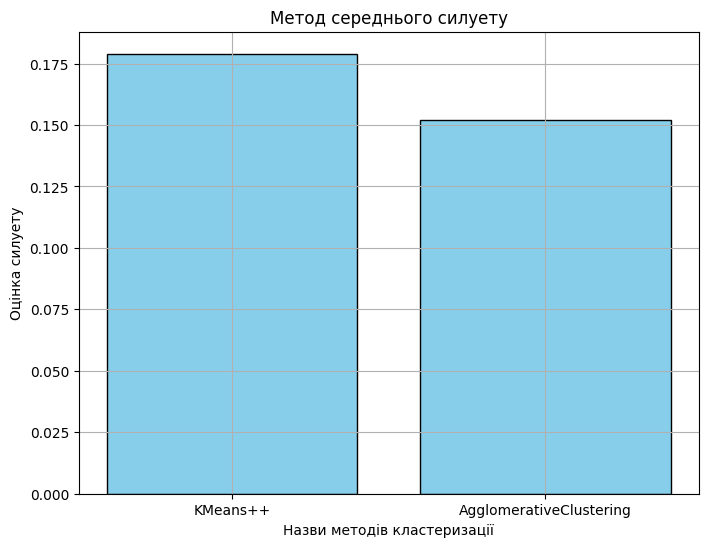

In [144]:
plt.figure(figsize=(8, 6))
plt.bar(['KMeans++', 'AgglomerativeClustering'], comparison_silhouette_scores, color='skyblue', edgecolor='black')
plt.xlabel('Назви методів кластеризації')
plt.ylabel('Оцінка силуету')
plt.title('Метод середнього силуету')
plt.grid(True)
plt.show()

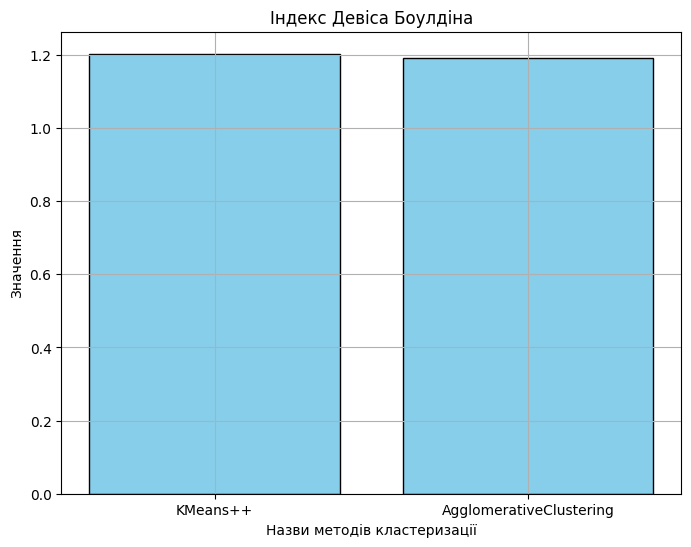

In [145]:
plt.figure(figsize=(8, 6))
plt.bar(['KMeans++', 'AgglomerativeClustering'], comparison_davies_bouldin_scores, color='skyblue', edgecolor='black')
plt.xlabel('Назви методів кластеризації')
plt.ylabel('Значення')
plt.title('Індекс Девіса Боулдіна')
plt.grid(True)
plt.show()

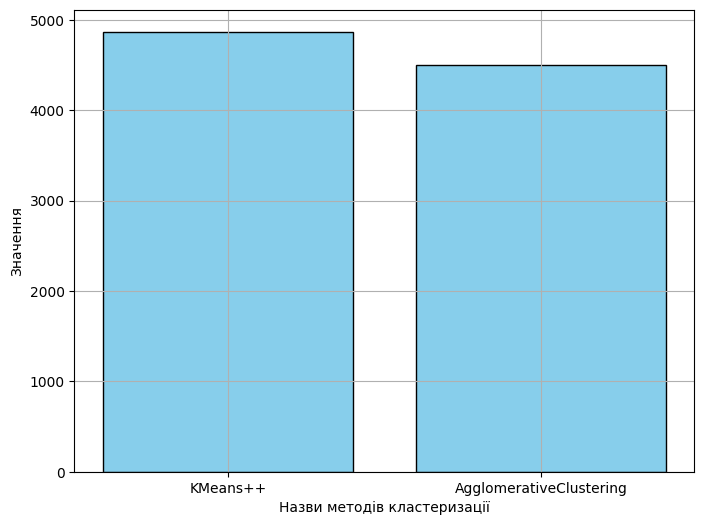

In [146]:
plt.figure(figsize=(8, 6))
plt.bar(['KMeans++', 'AgglomerativeClustering'], comparison_calinski_harabasz_scores, color='skyblue', edgecolor='black')
plt.xlabel('Назви методів кластеризації')
plt.ylabel('Значення')
plt.xticks(['KMeans++', 'AgglomerativeClustering'])
plt.grid(True)
plt.show()